In [ ]:
cd /content/drive/MyDrive/qazi MSDS-20/semester 3/Medical Image Computing/MIC_Assignment02/Dataset/

/content/drive/MyDrive/qazi MSDS-20/semester 3/Medical Image Computing/MIC_Assignment02/Dataset


In [ ]:
ls

Image1.png  Image2.jpg  Image3.jpg  Image4.jpg  Image5.png  Image6.png


In [ ]:
import skimage.io
import skimage.color
import skimage.filters
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.filters import threshold_otsu
from google.colab.patches import cv2_imshow

# Tasks to be performed:
You are given 3 images and you need to choose three images of your own for the tasks assigned
in this assignment. Use your dataset of 6 images to perform the following tasks.


Text(0.5, 1.0, 'img6')

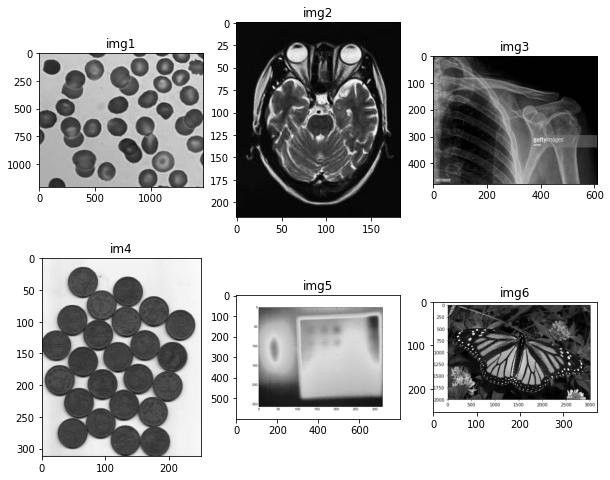

In [ ]:
# https://datacarpentry.org/image-processing/07-thresholding/
img = cv2.imread('Image1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('Image2.jpg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('Image3.jpg', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('Image4.jpg', cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread('Image5.png', cv2.IMREAD_GRAYSCALE)
img6 = cv2.imread('Image6.png', cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(nrows=2, ncols=3,
                         sharex=False, sharey=False, figsize=(10, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('img1')
ax[1].imshow(img2, cmap=plt.cm.gray)
ax[1].set_title('img2')
ax[2].imshow(img3, cmap=plt.cm.gray)
ax[2].set_title('img3')
ax[3].imshow(img4, cmap=plt.cm.gray)
ax[3].set_title('im4')
ax[4].imshow(img5, cmap=plt.cm.gray)
ax[4].set_title('img5')
ax[5].imshow(img6, cmap=plt.cm.gray)
ax[5].set_title('img6')


1. Pick up any three pictures and apply Otsu’s thresholding algorithm to convert the image
into a binary image and write your procedure in detail in the report.


In [ ]:
t1= skimage.filters.threshold_otsu(img)
binary_mask1 = img > t1

t2= skimage.filters.threshold_otsu(img2)
binary_mask2 = img2 > t2

t3= skimage.filters.threshold_otsu(img3)
binary_mask3 = img3 > t3


Text(0.5, 1.0, 'otsu')

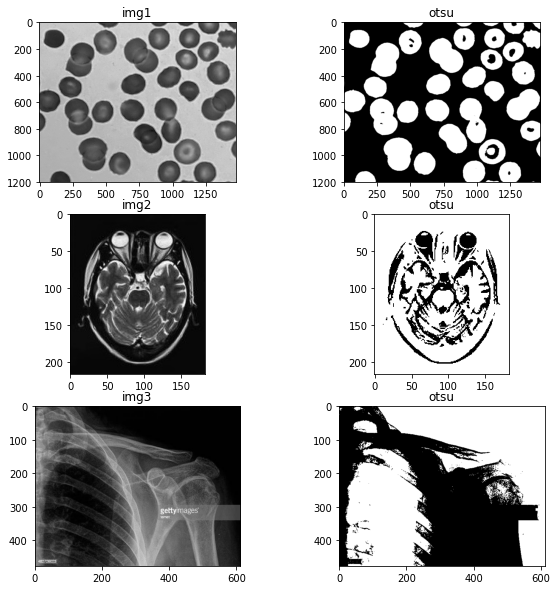

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2,
                         sharex=False, sharey=False, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('img1')
ax[1].imshow(binary_mask1, cmap=plt.cm.binary)
ax[1].set_title('otsu')
ax[2].imshow(img2, cmap=plt.cm.gray)
ax[2].set_title('img2')
ax[3].imshow(binary_mask2, cmap=plt.cm.binary)
ax[3].set_title('otsu')
ax[4].imshow(img3, cmap=plt.cm.gray)
ax[4].set_title('img3')
ax[5].imshow(binary_mask3, cmap=plt.cm.binary)
ax[5].set_title('otsu')


2. Pick one of the outputs of task 1 and apply morphological operations on it (opening and
closing) using three different structuring elements. Discuss your settings and outcomes
clearly in your report.


**Opening**

In [ ]:
# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

import cv2
import numpy as np

kernel = np.ones((5,5),np.uint8)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

**Closing**

In [ ]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

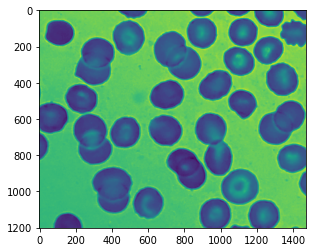

In [ ]:
plt.imshow(closing)

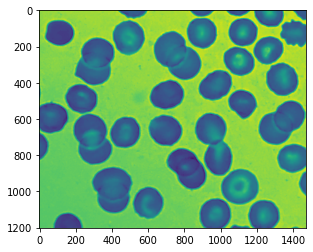

In [ ]:
plt.imshow(opening)

3. Apply K-Mean clustering algorithm on three images and discuss your results.


Text(0.5, 1.0, 'K means 3')

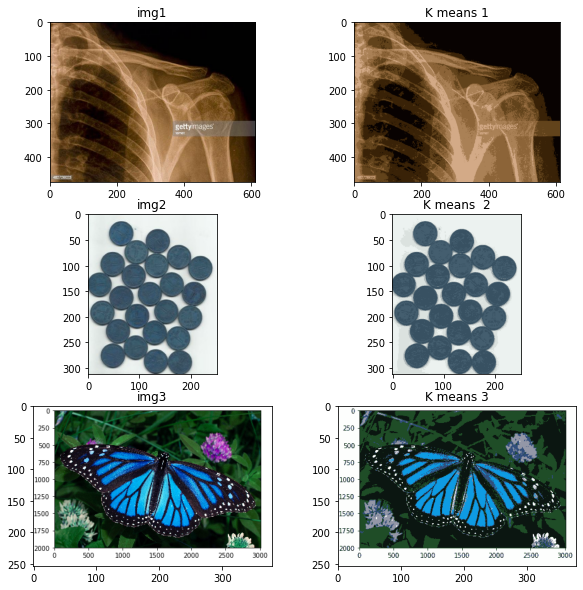

In [ ]:
# https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/

img1 = cv2.imread('Image3.jpg', cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Image4.jpg', cv2.COLOR_BGR2RGB)
img3 = cv2.imread('Image6.png', cv2.COLOR_BGR2RGB)


# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals1 = img1.reshape((-1,3))
pixel_vals2 = img2.reshape((-1,3))
pixel_vals3 = img3.reshape((-1,3))

# Convert to float type
pixel_vals1 = np.float32(pixel_vals1)
pixel_vals2 = np.float32(pixel_vals2)
pixel_vals3 = np.float32(pixel_vals3)



#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 6
retval1, labels1, centers1 = cv2.kmeans(pixel_vals1, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
retval2, labels2, centers2 = cv2.kmeans(pixel_vals2, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
retval3, labels3, centers3 = cv2.kmeans(pixel_vals3, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers1 = np.uint8(centers1)
segmented_data1 = centers1[labels1.flatten()]

# reshape data into the original image dimensions
segmented_image1 = segmented_data1.reshape((img1.shape))




centers2 = np.uint8(centers2)
segmented_data2 = centers2[labels2.flatten()]

# reshape data into the original image dimensions
segmented_image2 = segmented_data2.reshape((img2.shape))



centers3 = np.uint8(centers3)
segmented_data3 = centers3[labels3.flatten()]

# reshape data into the original image dimensions
segmented_image3 = segmented_data3.reshape((img3.shape))


fig, axes = plt.subplots(nrows=3, ncols=2,
                         sharex=False, sharey=False, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(img1)
ax[0].set_title('img1')
ax[1].imshow(segmented_image1)
ax[1].set_title('K means 1')
ax[2].imshow(img2)
ax[2].set_title('img2')
ax[3].imshow(segmented_image2)
ax[3].set_title('K means  2')
ax[4].imshow(img3)
ax[4].set_title('img3')
ax[5].imshow(segmented_image3)
ax[5].set_title('K means 3')

5. Apply superpixel segmentation on any three images from the dataset and discuss your
results.


In [ ]:
# https://www.pyimagesearch.com/2014/07/28/a-slic-superpixel-tutorial-using-python/
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse

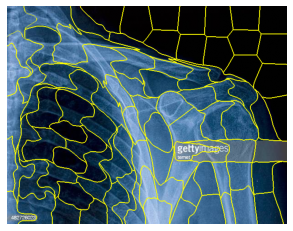

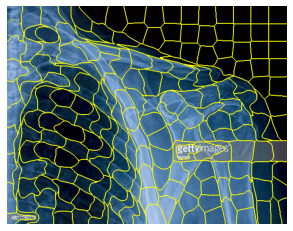

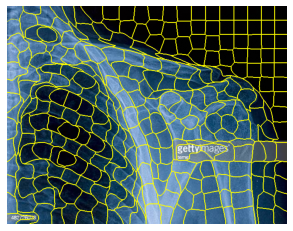

In [ ]:
# load the image and convert it to a floating point data type
image = img_as_float(io.imread('Image3.jpg'))
# loop over the number of segments
for numSegments in (100, 200, 300):
	# apply SLIC and extract (approximately) the supplied number
	# of segments
	segments = slic(image, n_segments = numSegments, sigma = 5)
	# show the output of SLIC
	fig = plt.figure("Superpixels -- %d segments" % (numSegments))
	ax = fig.add_subplot(1, 1, 1)
	ax.imshow(mark_boundaries(image, segments))
	plt.axis("off")
# show the plots
plt.show()

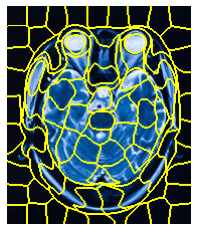

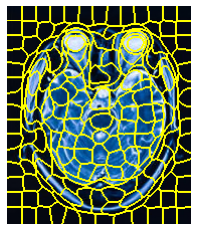

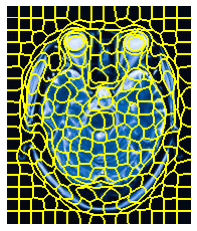

In [ ]:
# load the image and convert it to a floating point data type
image = img_as_float(io.imread('Image2.jpg'))
# loop over the number of segments
for numSegments in (100, 200, 300):
	# apply SLIC and extract (approximately) the supplied number
	# of segments
	segments = slic(image, n_segments = numSegments, sigma = 5)
	# show the output of SLIC
	fig = plt.figure("Superpixels -- %d segments" % (numSegments))
	ax = fig.add_subplot(1, 1, 1)
	ax.imshow(mark_boundaries(image, segments))
	plt.axis("off")
# show the plots
plt.show()

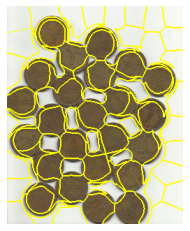

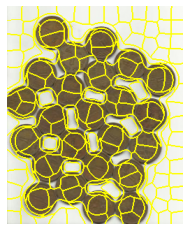

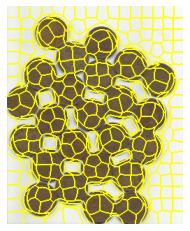

In [ ]:
# load the image and convert it to a floating point data type
image = img_as_float(io.imread('Image4.jpg'))
# loop over the number of segments
for numSegments in (100, 200, 300):
	# apply SLIC and extract (approximately) the supplied number
	# of segments
	segments = slic(image, n_segments = numSegments, sigma = 5)
	# show the output of SLIC
	fig = plt.figure("Superpixels -- %d segments" % (numSegments))
	ax = fig.add_subplot(1, 1, 1)
	ax.imshow(mark_boundaries(image, segments))
	plt.axis("off")
# show the plots
plt.show()

6. Apply watershed segmentation on any three images and discuss your results.


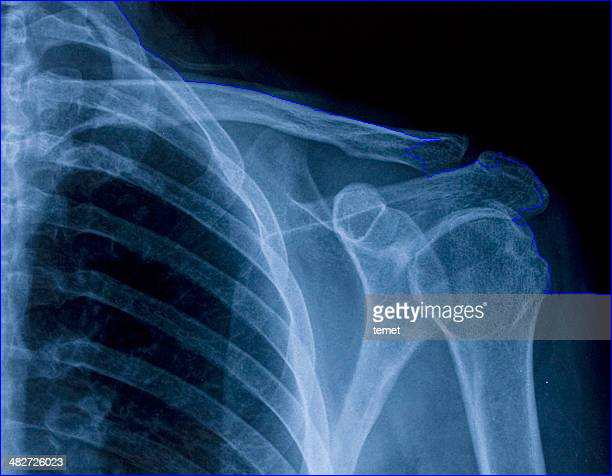

In [ ]:
# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html

import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('Image3.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
cv2_imshow(img)

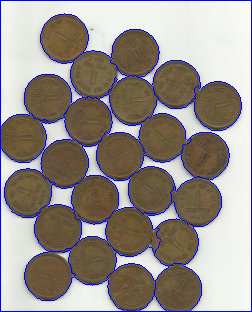

In [ ]:
img = cv2.imread('Image4.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
cv2_imshow(img)

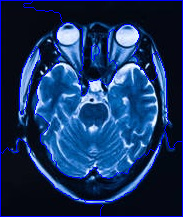

In [ ]:
img = cv2.imread('Image2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
cv2_imshow(img)

7. Apply grab-cut segmentation on any three images then show and discuss your results.


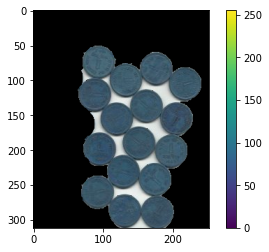

(<matplotlib.image.AxesImage at 0x7fef677f25d0>,
 None)

In [ ]:
# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_grabcut/py_grabcut.html

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Image4.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

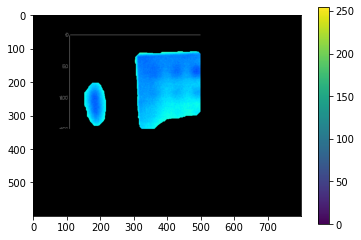

(<matplotlib.image.AxesImage at 0x7fef659f7250>,
 None)

In [ ]:
img = cv2.imread('Image5.png')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

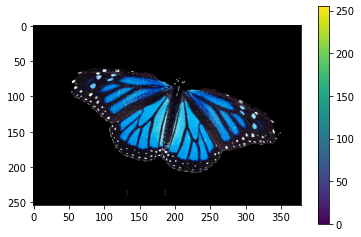

(<matplotlib.image.AxesImage at 0x7fef65abe310>,
 None)

In [ ]:
img = cv2.imread('Image6.png')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

8. Apply active contour segmentation on any three images of your choice and discuss your
findings.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.


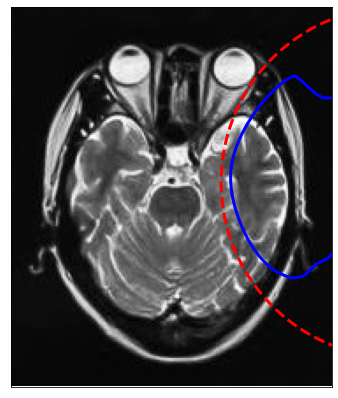

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = cv2.imread('Image2.jpg')
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  # This is added back by InteractiveShellApp.init_path()


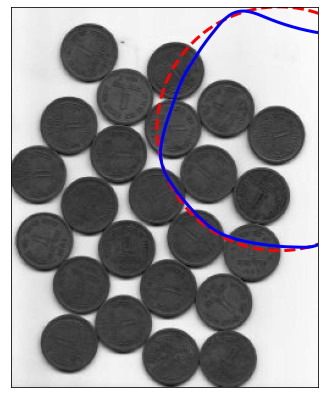

In [ ]:

img = cv2.imread('Image4.jpg')
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  # This is added back by InteractiveShellApp.init_path()


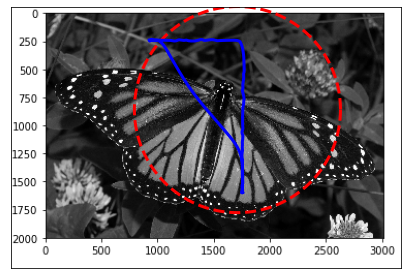

In [ ]:

img = cv2.imread('Image6.png')
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()



---
The End
